PREDICITNG THE SURVIVAL OF THE PASSENGERS USING THE TITANIC 

In [510]:
# We import the various libraries we are going to use
from ast import increment_lineno
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # OrdinalEncoder - Encode categorical features as integers, OneHotEncoder - converts categorical features into ont-hot-encoded arrays
from sklearn.impute import SimpleImputer # Fills the missing values witha specified startegy

from sklearn.compose import make_column_transformer # A helper function to create a ColumnTransformer, which applies different preprocessing steps to specific columns.
from sklearn.pipeline import Pipeline,make_pipeline  # Pipeline-chains multiple processing steps together to streamline workflows. make_pipeline - A convenience function to create a pipeline without naming the steps explicitly.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # A Naive Bayes model based on Gaussian distributions, used for classification.
from sklearn.compose import ColumnTransformer # Used for applying transformations to specific columns of a dataset.
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split,GridSearchCV

In [512]:
# Loading the datasets from CSV files into pandas DataFrames.
train_df = pd.read_csv("C:/Users/Administrator/Documents/train.csv")
test_df = pd.read_csv("C:/Users/Administrator/Documents/test.csv")

In [181]:
# printing the first five rows or train_df
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
# We use the sample() to select 10 random row from the dataset
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
213,214,0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,NaN,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [185]:
# Displaying a summary of the training dataset, including:
# - Number of rows and columns.
# - Column names, data types, and non-null counts (to check for missing values).
# - Memory usage.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
# Generating summary statistics for the numeric columns in the train_df dataset.
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [189]:
# Displaying the list of column names in the training dataset.
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [191]:
# Accessing the 'Survived' column from the training dataset.
train_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [193]:
# Grouping passengers by 'Pclass' and counting the number of rows (passengers) in each class.
# Sorting the results by the count of passengers in descending order.
train_df.groupby(['Pclass'], as_index=False)['Survived'].count().sort_values(by='Survived', ascending=False)

,Pclass,Survived
2,3,491
0,1,216
1,2,184


In [195]:
# Displaying the shape (number of rows and columns) of the training dataset.
train_df.shape

(891, 12)

In [197]:
# Generating summary statistics for categorical columns in the training dataset.
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [199]:
# Generating a full summary of the dataset, including both numeric and categorical columns.
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [201]:
# Grouping the dataset by 'Pclass' and calculating the mean survival rate for each class.
train_df.groupby(['Pclass'],as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [203]:
# Grouping the dataset by the number of siblings/spouses aboard ('SibSp') and counting the number of passengers in each group.
train_df.groupby(['SibSp'], as_index=False)['Survived'].count()

,SibSp,Survived
0,0,608
1,1,209
2,2,28
3,3,16
4,4,18
5,5,5
6,8,7


In [205]:
# Creating a new feature 'Family_size' by summing 'Parch' (parents/children), 'SibSp' (siblings/spouses), and 1 (the passenger themselves).
train_df['Family_size']=train_df['Parch'] + train_df['SibSp'] + 1
test_df['Family_size']=test_df['Parch'] + train_df['SibSp'] + 1

In [207]:
# We print the first 10 rows to check if the 'family_size' column has been added
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [209]:
# List the number of columns in the dataset to check the new number of columns
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size'],
      dtype='object')

In [211]:
# Grouping the dataset by 'Family_size' and counting the number of passengers for each family size.
train_df.groupby(['Family_size'], as_index=False)['Survived'].count()

,Family_size,Survived
0,1,537
1,2,161
2,3,102
3,4,29
4,5,15
5,6,22
6,7,12
7,8,6
8,11,7


In [215]:
# Mapping 'Family_size' to broader categories ('Alone', 'Small', 'Medium', 'Large') 
# To minimize the number of classes
family_map = {1:'Alone',2:'Small',3:'Small',4:'Small',5:'Medium',6:'Medium',7:'Large',8:'Large',11:'Large'}
train_df['Family_size_Grouped'] = train_df['Family_size'].map(family_map)
test_df['Family_size_Grouped'] = test_df['Family_size'].map(family_map)

In [217]:
# Grouping by 'Family_size_Grouped' and calculating the average survival rate for each family size category.
train_df.groupby(['Family_size_Grouped'], as_index=False)['Survived'].mean()

,Family_size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


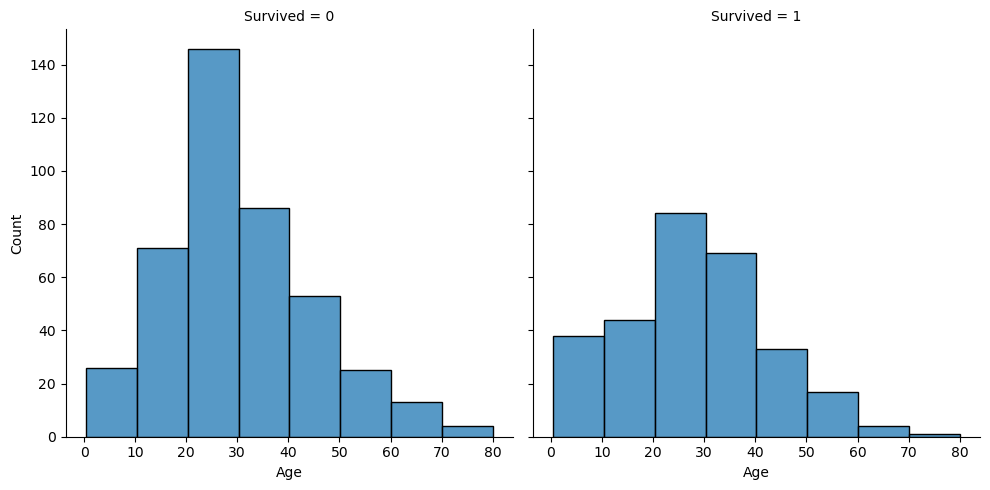

In [219]:
# Visualizing the distribution of ages for survivors and non-survivors.
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [221]:
# Displaying the unique age values in the dataset
train_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [223]:
# Discretizing the 'Age' column into 8 equal-sized bins using qcut, and creating a new column 'Age_Cut'.
# This helps in transforming the continuous 'Age' variable into categorical age groups for analysis or modeling.
train_df['Age_Cut']=pd.qcut(train_df['Age'],8)
test_df['Age_Cut']=pd.qcut(test_df['Age'],8)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,Alone,"(24.0, 28.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Alone,"(16.0, 20.125]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,Small,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Alone,"(24.0, 28.0]"


In [225]:
#Simplify the column
train_df['Age_Cut']=pd.qcut(train_df['Age'],8)
test_df['Age_Cut']=pd.qcut(test_df['Age'],8)
train_df['Age_Cut'].unique()

[(20.125, 24.0], (32.312, 38.0], (24.0, 28.0], NaN, (47.0, 80.0], (0.419, 16.0], (16.0, 20.125], (38.0, 47.0], (28.0, 32.312]]
Categories (8, interval[float64, right]): [(0.419, 16.0] < (16.0, 20.125] < (20.125, 24.0] < (24.0, 28.0] < (28.0, 32.312] < (32.312, 38.0] < (38.0, 47.0] < (47.0, 80.0]]

In [227]:
# Grouping the dataset by the 'Age_Cut' column and counting the number of passengers in each group.
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].count().sort_values(by='Survived', ascending=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8292\3605368544.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].count().sort_values(by='Survived', ascending=False)


,Age_Cut,Survived
0,"(0.419, 16.0]",100
2,"(20.125, 24.0]",98
5,"(32.312, 38.0]",91
7,"(47.0, 80.0]",89
6,"(38.0, 47.0]",88
3,"(24.0, 28.0]",85
4,"(28.0, 32.312]",84
1,"(16.0, 20.125]",79


In [229]:
# Checking the data type of the 'Age_Cut' column 
train_df['Age_Cut'].dtype

CategoricalDtype(categories=[ (0.419, 16.0], (16.0, 20.125], (20.125, 24.0],
                    (24.0, 28.0], (28.0, 32.312], (32.312, 38.0],
                    (38.0, 47.0],   (47.0, 80.0]],
, ordered=True, categories_dtype=interval[float64, right])

In [231]:
# Define a function to categorize ages into specific age groups based on given ranges.
# Converts categorical to interger
def determine_age_group(age):
    if 0 <= age <= 16:
        return 0
    elif 16.000001 <= age <= 20.125:
        return 1
    elif 20.125001 <= age <= 24:
        return 2
    elif 24.000001 <= age <= 28:
        return 3
    elif 28.000001 <= age <= 32.312:
        return 4
    elif 32.312001 <= age <= 38:
        return 5
    elif 38.000001 <= age <= 47:
        return 6
    elif 47.000001 <= age <= 80:
        return 7
    else:
        return 8

# We use the .map() function to apply the age grouping to both 'train_df' and 'test_df' datasets.
# This will replace the original continuous 'Age' column with the corresponding group numbers.
train_df['Age'] = train_df['Age'].map(determine_age_group)
test_df['Age'] = test_df['Age'].map(determine_age_group)

In [233]:
# Samples 10 values randomly to inspect the newly categorized age groups.
train_df['Age'].sample(10)

416    5
284    8
214    8
644    0
664    1
19     8
740    8
858    2
460    7
358    8
Name: Age, dtype: int64

In [235]:
# Display the first 5 rows of the train_df DataFrame to inspect the changes after transforming the 'Age' column into age groups.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_Grouped,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


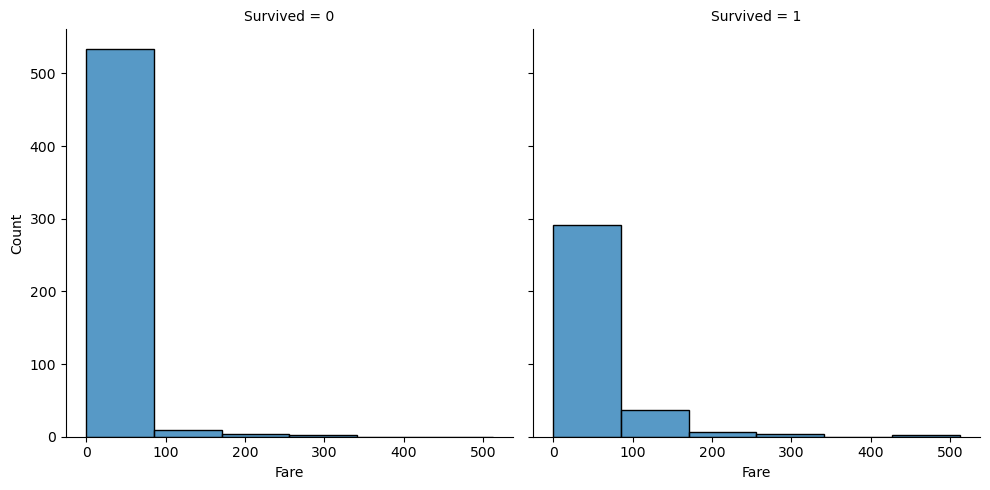

In [241]:
# Create distribution plots for the 'Fare' column, split by the 'Survived' column, to compare how fare distribution differs between passengers who survived and those who did not.
sns.displot(train_df, x='Fare', col='Survived', binwidth=80,height=5) 

In [243]:
# Get the unique fare values in the 'Fare' column.
train_df['Fare'].unique() 

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [245]:
# Display the 'Fare' column to view the ticket fare data for all passengers in the dataset.
train_df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [247]:
# Create a new column 'Fare_Cut' by binning the 'Fare' column into 6 quantiles, dividing the fare values into 6 equal-sized groups for analysis.
train_df['Fare_Cut']=pd.qcut(train_df['Fare'],6)
test_df['Fare_Cut']=pd.qcut(test_df['Fare'],6)

In [249]:
# Group the dataset by 'Fare_Cut' and calculate the mean survival rate within each fare category to understand the relationship between fare and survival.
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8292\2393953937.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [251]:
# Categorize the 'Fare' column into specific groups based on predefined fare ranges.
def determine_fare_group(fare):
    if 0 <= fare <= 7.775:
        return 0
    elif 7.775 <= fare <= 8.662:
        return 1
    elif 8.662 <= fare <= 14.454:
        return 2
    elif 14.454 <= fare <= 26:
        return 3
    elif 26 <= fare <= 52.369:
        return 4
    elif 52.369 <= fare <= 512.329:
        return 5
    else:
        return 6

train_df['Fare'] = train_df['Fare'].map(determine_fare_group)
test_df['Fare'] = test_df['Fare'].map(determine_fare_group)

In [253]:
# Check the unique values in the 'Fare' column.
train_df['Fare'].unique()

array([0, 5, 1, 4, 3, 2, 6], dtype=int64)

In [255]:
# Display the first values of the 'Name' column to inspect the format and values of passenger names.
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [257]:
# Split each name into individual characters and extract the second character to explore patterns in the names.
train_df['Name'].str.split(pat="",expand=True)[1]

0      B
1      C
2      H
3      F
4      A
      ..
886    M
887    G
888    J
889    B
890    D
Name: 1, Length: 891, dtype: object

In [259]:
# Extract the title from the 'Name' column. 
train_df['Title']=train_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True,)[0].apply(lambda x:x.strip())
test_df['Title']=test_df['Name'].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True,)[0].apply(lambda x:x.strip())                                                                                                                

In [261]:
# Group the training dataset by 'Title' and calculate the mean survival rate for each title.
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


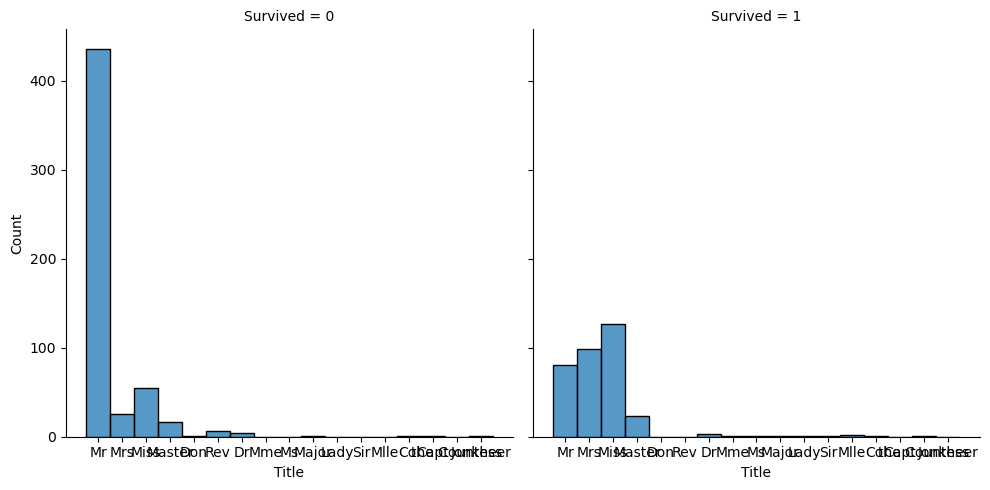

In [263]:
# Plot the distribution of passenger titles based on survival status.
sns.displot(train_df, x='Title', col='Survived', binwidth=80,height=5)

In [265]:
# Group specific titles in the 'Title' column into broader categories such as 'Military' and 'Noble'
train_df['Title'] = train_df['Title'].replace({
    'Capt':'Military',
    'Col':'Military',
    'Major':'Military',
    'Jonkheer':'Noble',
    'the Countess':'Noble',
    'Don':'Noble',
    'Lady':'Noble',
    'Sir':'Noble',
    'Mlle':'Noble',
    'Ms':'Noble',
    'Mme':'Noble'
})

test_df['Title'] = test_df['Title'].replace({
    'Capt':'Military',
    'Col':'Military',
    'Major':'Military',
    'Jonkheer':'Noble',
    'the Countess':'Noble',
    'Don':'Noble',
    'Lady':'Noble',
    'Sir':'Noble',
    'Mlle':'Noble',
    'Ms':'Noble',
    'Mme':'Noble'
})

In [267]:
# Check the unique values in the 'Title' column to ensure that the title replacements were applied correctly.
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Noble', 'Rev', 'Dr', 'Military'],
      dtype=object)

In [271]:
# Group the data by 'Title' and calculate the count of passengers and the mean survival rate for each title.
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean']) 

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [273]:
# Calculate the length of each name and create a new 'Name_Length' feature in both datasets.
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x)) #  apply() function is used to apply a function along an axis.lambda x: len(x) is an anonymous function that takes each name (string) in the Name column and calculates its length using len(x). 
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

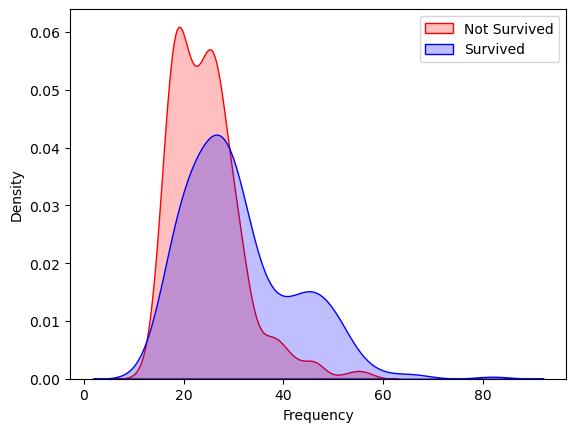

In [275]:
# A KDE plot to compare the distribution of name lengths between passengers who survived and those who did not.
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color='Red',fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g,color='Blue',fill=True)
g.set_xlabel('Name_Length')
g.set_xlabel('Frequency')
g = g.legend(['Not Survived','Survived']) # This line sets the legend for the plot, indicating which color represents the "Not Survived" and "Survived" groups.
# sns.kdeplot():generates a Kernel Density Estimate (KDE) plot.

In [277]:
# Create new categorical feature 'Name_LengthGB' by grouping 'Name_Length' into 8 equal-sized bins (quantiles) 
# pd.qcut() allows to categorize names based on their length into 8 groups.
train_df['Name_LengthGB']=pd.qcut(train_df['Name_Length'],8)
test_df['Name_LenthGB']=pd.qcut(test_df['Name_Length'],8)
train_df['Name_LengthGB']

0       (20.0, 23.0]
1       (38.0, 82.0]
2       (20.0, 23.0]
3       (38.0, 82.0]
4       (23.0, 25.0]
           ...      
886     (20.0, 23.0]
887    (27.25, 30.0]
888     (38.0, 82.0]
889     (20.0, 23.0]
890     (18.0, 20.0]
Name: Name_LengthGB, Length: 891, dtype: category
Categories (8, interval[float64, right]): [(11.999, 18.0] < (18.0, 20.0] < (20.0, 23.0] < (23.0, 25.0] < (25.0, 27.25] < (27.25, 30.0] < (30.0, 38.0] < (38.0, 82.0]]

In [279]:
# Group the data by the new 'Name_LengthGB' feature to analyze how survival rates differ based on name length categories. 
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].agg(['count','mean'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8292\1393078182.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].agg(['count','mean'])


,Name_LengthGB,count,mean
0,"(11.999, 18.0]",140,0.214286
1,"(18.0, 20.0]",103,0.252427
2,"(20.0, 23.0]",117,0.307692
3,"(23.0, 25.0]",98,0.346939
4,"(25.0, 27.25]",99,0.292929
5,"(27.25, 30.0]",112,0.428571
6,"(30.0, 38.0]",116,0.517241
7,"(38.0, 82.0]",106,0.745283


In [281]:
# Define a function to categorize name length into different groups. 
# The function maps each name length to a corresponding group, with numerical values indicating the size of the name.
def determine_name_group(name):

    if 0 <= name <=18:
        return 0
    elif 18 <= name <= 20:
        return 1
    elif 20 <= name<= 23:
        return 2
    elif 23 <= name <= 25:
        return 3
    elif 25 <= name <= 27.25:
        return 4
    elif 27.25 <= name<= 30:
        return 5
    elif 30 <= name<= 38:
        return 5
    elif 38 <= name<= 82:
        return 5
    else:
        return 6

train_df['Name_Size'] = train_df['Name_Length'].map(determine_name_group)
test_df['Name_Size'] = test_df['Name_Length'].map(determine_name_group)

In [283]:
# Display all the rows. It outputs the first five and the last five rows
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_Grouped,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",5
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",5
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,2,NaN,S,1,Alone,"(24.0, 28.0]","(8.662, 14.454]",Rev,21,"(20.0, 23.0]",2
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,4,B42,S,1,Alone,"(16.0, 20.125]","(26.0, 52.369]",Miss,28,"(27.25, 30.0]",5
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,8,1,2,W./C. 6607,3,NaN,S,4,Small,NaN,"(14.454, 26.0]",Miss,40,"(38.0, 82.0]",5
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,4,C148,C,1,Alone,"(24.0, 28.0]","(26.0, 52.369]",Mr,21,"(20.0, 23.0]",2


In [285]:
# Access the ticket column
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [287]:
# Extract the ticket number by splitting the ticket string and selecting the last part.
train_df['Ticket'].apply(lambda X: pd.Series({'Ticket': X.split()[-1]}))

,Ticket
0,21171
1,17599
2,3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,6607
889,111369


In [289]:
# Extract the ticket number from the 'Ticket' column and store it in a new column 'TicketNumber' for both the datasets.
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda X: pd.Series({'Ticket': X.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda X: pd.Series({'Ticket': X.split()[-1]}))

In [291]:
# Group the dataset by ticket number, calculate the count and survival rate for each ticket number, and sort the results by the number of occurrences in descending order.
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [293]:
# Counts the number of occurrences of each unique ticket number and adds the result as a new column for each row.
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [295]:
# Add a column to both train and test datasets with the count of passengers sharing the same ticket number.
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts']

0      1
1      1
2      1
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: TicketNumberCounts, Length: 418, dtype: int64

In [297]:
# Groups the training data by the count of passengers sharing the same ticket number and calculates the total count and average survival rate for each group, sorted by the number of passengers.
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count','mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [299]:
# Split the 'Ticket' column into separate columns.
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [301]:
# Create a 'TicketLocation' column by extracting the first part of the ticket number, or assign 'Blank' if there is no second part.
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [131]:
test_df['TicketLocation'].value_counts()

TicketLocation
Blank         296
PC             32
C.A.           19
SOTON/O.Q.      8
SC/PARIS        6
W./C.           5
CA.             4
S.O./P.P.       4
CA              4
F.C.C.          4
C               3
A/5.            3
A/4             3
F.C.            2
A/5             2
STON/O          2
SC/AH           2
S.O.C.          2
SC/Paris        1
LP              1
AQ/4            1
SC              1
A.              1
AQ/3.           1
S.C./PARIS      1
PP              1
SOTON/O2        1
SC/A4           1
SOTON/OQ        1
STON/OQ.        1
A./5.           1
SC/A.3          1
STON/O2.        1
W.E.P.          1
A.5.            1
Name: count, dtype: int64

In [303]:
# Standardizes the 'TicketLocation' values by replacing certain ticket location identifiers with a consistent format.
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',
})

In [305]:
# Group the dataset by 'TicketLocation' and calculate the count and survival rate for each ticket location.
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count','mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [309]:
# Fill missing values in the 'Cabin' column with 'U' in train_df, and extract the first letter of each cabin for further analysis.
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] =  pd.Series([i[0] if not pd.isna(i) else 'x' for i in train_df['Cabin']])

In [311]:
# Fill missing values in the 'Cabin' column with 'U' in the test_df, and extract the first letter of each cabin.
test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] =  pd.Series([i[0] if not pd.isna(i) else 'x' for i in test_df['Cabin']])

In [313]:
# Print all the values in the Cabin column, where missing values have been filled with 'U' and each cabin entry is represented by its first letter, or 'x' if the entry was missing.
train_df['Cabin']

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Cabin, Length: 891, dtype: object

In [315]:
# Group the dataset by 'Cabin' and calculate the count and mean survival rate ('Survived') for each cabin group.
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [319]:
train_df['Cabin_assigned'] =  train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1 )
test_df['Cabin_assigned'] = test_df['Cabin'].apply(lambda x: 0 if x  in ['U'] else 1 )

In [321]:
# Create a new column 'Cabin_assigned' that assigns a value of 0 if the 'Cabin' is 'U' (unknown), and 1 if the 'Cabin' is not 'U'.
train_df.groupby(['Cabin_assigned'], as_index=False)['Survived'].agg(['count','mean'])

,Cabin_assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [325]:
# View the first five rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,5,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",5,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,1,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,5,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",5,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3,373450,1,Blank,0


In [327]:
# Display the values in the Family_size_Grouped column
train_df['Family_size_Grouped']

0      Small
1      Small
2      Alone
3      Small
4      Alone
       ...  
886    Alone
887    Alone
888    Small
889    Alone
890    Alone
Name: Family_size_Grouped, Length: 891, dtype: object

In [329]:
# Display the number of rows and columns in the train_df DataFrame.
train_df.shape

(891, 24)

In [331]:
# Display the number of rows and columns in the test_df DataFrame.
test_df.shape

(418, 23)

In [333]:
# Display a summary of the train_df DataFrame
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  891 non-null    int64   
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    int64   
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_size          891 non-null    int64   
 13  Family_size_Grouped  891 non-null    object  
 14  Age_Cut              714 non-null    category
 15  Fare_Cut             89

In [335]:
# Display all column names in the train_df DataFrame.
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'Family_size_Grouped', 'Age_Cut', 'Fare_Cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_assigned'],
      dtype='object')

In [337]:
# Display a summary of the test_df DataFrame
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  418 non-null    int64   
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 418 non-null    int64   
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_size          418 non-null    float64 
 12  Family_size_Grouped  414 non-null    object  
 13  Age_Cut              332 non-null    category
 14  Fare_Cut             417 non-null    category
 15  Title                41

In [341]:
# Fill missing values in 'Age' for both train_df and test_df with the mean age of the respective datasets.
# Fill missing values in 'Fare' for test_df with the mean fare of the dataset.
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

In [345]:
# Initialize encoders and imputer for preprocessing:
# - OneHotEncoder: Converts categorical variables into a one-hot (binary) encoding.
# - OrdinalEncoder: Transforms categorical variables into ordinal values (ranked integers).
# - SimpleImputer: Fills missing values using the most frequent value in the column.
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [347]:
# Define the columns to be encoded:
# - ode_cols: Columns to be encoded using OrdinalEncoder (for ordered categories)
# - ohe_cols: Columns to be encoded using OneHotEncoder (for unordered categories)
ode_cols = ['Family_size_Grouped']
ohe_cols = ['Sex','Embarked']

In [349]:
# Prepare the training and test data:
# - X: Features for training (all columns except 'Survived').
# - y: Target variable for training ('Survived').
# - X_test: Features for testing (excluding 'Age_Cut' and 'Fare_Cut' which are not used for prediction).
X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']
X_test =  test_df.drop(['Age_Cut', 'Fare_Cut'], axis=1)

In [351]:
# Split the dataset into training and validation sets:
# - 80% of the data is used for training (X_train, y_train).
# - 20% of the data is used for validation (X_valid, y_valid).
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,stratify=y, random_state=21)

In [353]:
# Define a pipeline to handle ordinal features:
# - First, missing values are imputed using the most frequent value in each column ('SimpleImputer').
# - Then, the categorical values are encoded into ordinal integers, preserving the order of categories ('OrdinalEncoder').
ordinal_pipeline = Pipeline(steps=[
    ('Impute', SimpleImputer(strategy='most_frequent')),
    ('Ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [357]:
# Define a pipeline to process categorical features:
# - First, missing values are imputed using the most frequent value in each column ('SimpleImputer').
# - Then, the categorical features are one-hot encoded ('OneHotEncoder'), transforming them into binary vectors.
ohe_pipeline = Pipeline(steps=[
    ('Impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [359]:
# Define a ColumnTransformer 
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass', 'Cabin_assigned',  'Name_Size', 'TicketNumberCounts','Age','Fare'])
    ],
      remainder='drop',
      n_jobs=-1
    )

In [ ]:
# Initialize a Random Forest Classifier model
rfc = RandomForestClassifier()

In [377]:
# Define a parameter grid for hyperparameter tuning of the RandomForestClassifier
param_grid = {
    'n_estimators': [100, 150, 200],
    'min_samples_split': [5, 10, 15],
    'max_depth': [8, 9, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [387]:
# Perform hyperparameter tuning using GridSearchCV for the RandomForestClassifier.
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', verbose=1)

In [389]:
# Create a pipeline that combines the preprocessing steps (column transformations) and RandomForestClassifier
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                   'TicketNumberCounts', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]},
                              scoring='accuracy', verbose=1))])

In [401]:
# Check if best hyperparameters were found during GridSearchCV and print them; if not, print a message indicating that 'no best parameters were found'.
if CV_rfc.best_params_ is not None:
    print(CV_rfc.best_params_)
else:
    print("No best parameters found.")

# Check if best score was found during GridSearchCV and print it; if not, print a message indicating that no best score was found.
if CV_rfc.best_score_ is not None:
    print(CV_rfc.best_score_)
else:
    print("No best score found.")

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
0.8384615384615385


In [403]:
# Initialize the DecisionTreeClassifier model
dtc = DecisionTreeClassifier()

In [405]:
# Define the hyperparameter grid for tuning the DecisionTreeClassifier
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth':[10,20,30],
    'min_samples_leaf': [1,2,4],
    'criterion':['gini','entropy'],
}

In [407]:
# Perform hyperparameter tuning using GridSearchCV with cross-validation.
CV_dtc =  GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [413]:
# Create a pipeline that combines preprocessing (ColumnTransformer) and DecisionTreeClassifier with hyperparameter tuning (GridSearchCV).
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [417]:
# Display the best hyperparameters and score for the DecisionTreeClassifier
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8075642667191965


In [419]:
# Initialize the KNeighborsClassifier
knn = KNeighborsClassifier()

In [421]:
# Define a parameter grid for hyperparameter tuning of the KNN classifier
param_grid = {
    'n_neighbors': [3,5,7,9,11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [423]:
# Use GridSearchCV to perform hyperparameter tuning on the KNN model
CV_knn =  GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [427]:
# Create a pipeline that first applies the column transformations (imputing, encoding) and then fits the KNN model
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [429]:
# Output the best hyperparameters and best score from the GridSearchCV process for KNN
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'ball_tree', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.8061656653205949


In [439]:
# Initializing the Support Vector Classifier 
svc = SVC()

In [440]:
# Define a parameter grid for hyperparameter tuning of the SVC model
param_grid = {
    'C': [100,10,1.0,0.1,0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [441]:
# Perform hyperparameter tuning using GridSearchCV for the Support Vector Classifier (SVC)
CV_svc =  GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [443]:
# Create a pipeline that combines the preprocessing steps (column transformations) and SVC with hyperparameter tuning
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001],
                                          'gamma': ['scale', 'auto'],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [449]:
# Print the best hyperparameters found during the GridSearchCV for the SVC model.
print(CV_svc.best_params_)

# Print the best cross-validation score achieved during the grid search.
print(CV_svc.best_score_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.8202107751403526


In [471]:
# Initializing LogisticRegression classifier
lr = LogisticRegression(max_iter=1000) # Increase the number of iterations

In [469]:
# Define a parameter grid for hyperparameter tuning
param_grid ={
    'C': [100,10,1.0,0.1,0.001, 0.001],
}

In [ ]:
lr = LogisticRegression(max_iter=1000)

In [475]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

pipefinallr = make_pipeline(
    col_trans,
    scaler,  # Add the scaler here
    CV_lr
)

In [477]:
# Initialize GridSearchCV to tune the hyperparameters of the Logistic Regression model
CV_lr =  GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [479]:
# Create a pipeline combining the column transformer and GridSearchCV for Logistic Regression
pipefinallr = make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(max_iter=1000),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [481]:
# print the best hyperparameters and the best score for the LogisticRegression
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 10}
0.8005909583374373


In [485]:
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

In [487]:
# defining a hyperparameter for the Gaussian Naive Bayes model. 
param_grid = {
    'var_smoothing': [0.00000001,0.000000001, 0.000000001,]
}

In [489]:
# Hyperparameter tuning using GridSearchCV
CV_gnb =  GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [493]:
# Fit the model using pipeline
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('Impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeli...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-09]}))])

In [495]:
# Print the best parameters and best score
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7823598936274992


In [497]:
# Predicting the target variable (Survived) for the validation set using the various classifiers pipeline used above.
Y_pred = pipefinalrfc.predict(X_valid)
Y_pred1 = pipefinaldtc.predict(X_valid)
Y_pred2 = pipefinalknn.predict(X_valid)
Y_pred3 = pipefinalsvc.predict(X_valid)
Y_pred4 = pipefinallr.predict(X_valid)
Y_pred5 = pipefinalgnb.predict(X_valid)

In [501]:
# Importing the classification_report function from sklearn.metrics
from sklearn.metrics import classification_report

# Generating and printing the classification report for the DecisionTreeClassifier model
# It compares the predicted values (Y_pred1) with the actual values (y_valid) from the validation set
print(classification_report(y_valid, Y_pred1))
# Accessing the 3rd element of the _pred array                                             
Y_pred[2]

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       110
           1       0.68      0.62      0.65        69

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.74      0.74      0.74       179



0

In [508]:
# Precision for Class 0 (Survived =0) = 0.78: This means that out of all the passengers the model predicted as not surviving (class 0), 78% were correctly identified as not surviving.
# Precision for Class 1 (Survived = 1) = 0.68: This means that out of all the passengers the model predicted as surviving (class 1), 68% were correctly identified as actually surviving.
# Recall for Class 0 (Survived = 0) = 0.82: This means that the model was able to correctly identify 82% of all the passengers who actually did not survive.
# Recall for Class 1 (Survived = 1) = 0.62: This means that the model was able to correctly identify 62% of all the passengers who actually survived.
# F1-Score for Class 0 (Survived = 0): 0.80
# F1-Score for Class 1 (Survived = 1): 0.65
# Overall accuracy: 0.74 (74%)
# Macro Average: Precision: 0.73, Recall: 0.72, F1-Score: 0.72
# Weighted Average: Precision: 0.74, Recall: 0.74, F1-Score: 0.74